# IPython Notebook for determining phase transition temperature

## Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output
import  matplotlib.animation as animation
import scipy.optimize as opt

In [2]:
from mcutils import *

In [3]:
beta = [0.4, 0.425, 0.43, 0.435, 0.44, 0.45]
B = [0.,0.,0.,0.,0.,0.]
obsfilePath_list = ['params_out/out'+str(st)+'.txt' for st in range(12,18)]
n_th_array = [10000 for i in range(6)]

observables = []

for i in range(len(beta)):
    obsData = importObsData(obsfilePath_list[i])
    n_th = n_th_array[i]
    k_max = 500

    energyNoTherm = np.array(obsData[1][n_th:])
    energy_autocorr_array = calc_autocorr(energyNoTherm, k_max)
    energyFitParams = fit_autocorr_time(energy_autocorr_array, k_max)
    energy_tau_int = integrated_autocorr_time(energy_autocorr_array)

    magnNoTherm = np.array(obsData[2][n_th:])
    magn_autocorr_array = calc_autocorr(magnNoTherm, k_max)
    magnFitParams = fit_autocorr_time(magn_autocorr_array, k_max)
    magn_tau_int = integrated_autocorr_time(magn_autocorr_array)

    observables.append([np.mean(energyNoTherm),np.std(energyNoTherm),np.std(energyNoTherm)/np.sqrt(len(energyNoTherm)/(2*energyFitParams[1])),energyFitParams[1],np.mean(magnNoTherm),np.std(magnNoTherm),np.std(magnNoTherm)/np.sqrt(len(magnNoTherm)/(2*magnFitParams[1])),magnFitParams[1]])
    print(i)

0
1
2
3
4
5


In [4]:
file = open("phase_transition_res.txt","w")
file.write("beta\tB\t<H>\tsigma(h)\terr(H)\ttau_H\t<M>\tsigma(M)\terr(M)\ttau_M\n")
for i in range(len(beta)):
    file.write("%e\t%e"%(beta[i],B[i]))
    for j in range(8):
        file.write("\t%e"%observables[i][j])
    file.write("\n")
file.close()

It is not easy to make out from the observables where the phase transition occurs,
so we want to look at the plot of the magnetisation:

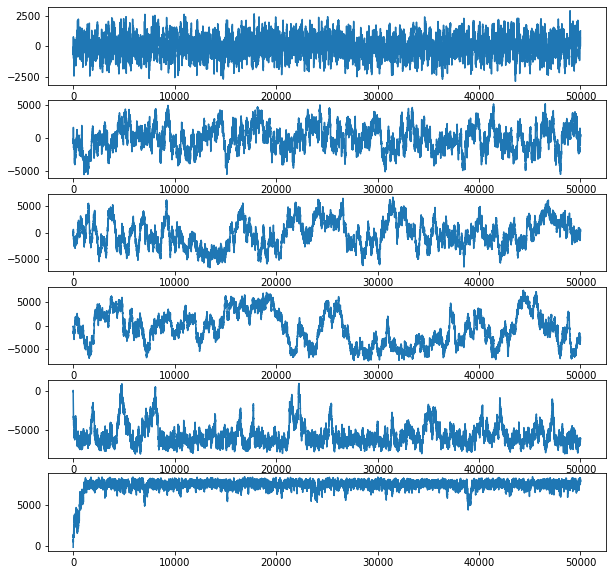

In [5]:
f, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(6, 1, figsize = (10,10))
obsData = importObsData(obsfilePath_list[0])
ax0.plot(obsData[0],obsData[2])
obsData = importObsData(obsfilePath_list[1])
ax1.plot(obsData[0],obsData[2])
obsData = importObsData(obsfilePath_list[2])
ax2.plot(obsData[0],obsData[2])
obsData = importObsData(obsfilePath_list[3])
ax3.plot(obsData[0],obsData[2])
obsData = importObsData(obsfilePath_list[4])
ax4.plot(obsData[0],obsData[2])
obsData = importObsData(obsfilePath_list[5])
ax5.plot(obsData[0],obsData[2])

One can see that the phase transition most likely happens between the last two parameters 
which means between beta = 0.44 and beta = 0.45, leaning towards 0.44, as the magnetisation looks
very stable at beta = 0.45. This value agrees with the theoretical value of: (which corresponds to a coupling of 1)

In [6]:
b_c = np.log(1 + np.sqrt(2))/2
print(b_c)

0.44068679350977147
